In [13]:
#행렬처리 모듈
import numpy as np
#자료구조인 Series, DataFrame 등을 제공하는 모듈
import pandas as pd
#추세 그래프 및 통계용 차트를 제공하는 시각화 모듈
import seaborn as sns
#그래프 및 시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn import linear_model
from sklearn.preprocessing import scale, robust_scale, minmax_scale
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#평가 함수
from sklearn import metrics
#os: 환겨설정 패키지
import os 

In [29]:
#1. 분석에 필요한 데이터 구성하기
ds_tele = pd.read_csv("../../실습화일/통신고객이탈.csv", engine="python")
ds_tel = ds_tele.copy()
#ds_house_x = ds_house.drop("MEDV", axis = 1, inplace = False)
ds_tel["CHURN"].replace(to_replace="Active", value=0, inplace = True)
ds_tel["CHURN"].replace(to_replace="Churned", value=1, inplace = True)
ds_tel.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [15]:
###의사결정 나무
#sklearn.tree 의 DecisionTreeClassifier : 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz : grahviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz
#graphviz import : 의사결정 나무 모델 시각화 .dot 확장자 파일 불러오는 패키지
import graphviz

In [16]:
#결측치 확인
ds_tel.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [30]:
ds_tel_dummy = ds_tel.drop("CUSTOMER_ID", axis = 1, inplace = False)
ds_tel_dummy = pd.get_dummies(ds_tel)
ds_tel_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
#데이터구성하기
np.random.seed(seed=1234)
msk = np.random.rand(ds_tel_dummy.shape[0])<0.7
ds_tel_train = ds_tel_dummy[msk]
ds_tel_test = ds_tel_dummy[~msk]
#train/test 데이터의 목표변수 설명변ㅅ 지정
ds_tel_train_y = ds_tel_train["CHURN"]
ds_tel_train_x = ds_tel_train.drop("CHURN", axis=1, inplace=False)
ds_tel_test_y = ds_tel_test["CHURN"]
ds_tel_test_x = ds_tel_test.drop("CHURN", axis = 1, inplace = False)

print("train data X size : {}".format(ds_tel_train_x.shape))
print("train data Y size : {}".format(ds_tel_train_y.shape))
print("test data X size : {}".format(ds_tel_test_x.shape))
print("test data Y size : {}".format(ds_tel_test_y.shape))

train data X size : (635, 963)
train data Y size : (635,)
test data X size : (295, 963)
test data Y size : (295,)


In [32]:
#데이터 분할 함수
from sklearn.model_selection import train_test_split
#dummy 변수로부터 변수 역할 지정
ds_tel_y = ds_tel_dummy["CHURN"]
ds_tel_x = ds_tel_dummy.drop("CHURN", axis = 1, inplace = False)
#train_test_split
ds_tel_train_x, ds_tel_test_x, ds_tel_train_y, ds_tel_test_y =\
train_test_split(ds_tel_x, ds_tel_y, test_size = 0.30, random_state = 1234)


print("train data X size : {}".format(ds_tel_train_x.shape))
print("test data Y size : {}".format(ds_tel_test_y.shape))
print("train data X size : {}".format(ds_tel_train_x.shape))
print("test data Y size : {}".format(ds_tel_test_y.shape))

train data X size : (651, 963)
test data Y size : (279,)
train data X size : (651, 963)
test data Y size : (279,)


In [33]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(ds_tel_train_x, ds_tel_train_y)

#훈련 데이터 정확도
print("Accucary on training set : {:.3f}".format(tree_uncustomized.score(ds_tel_train_x, ds_tel_train_y)))
#test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(ds_tel_test_x, ds_tel_test_y)))

Accucary on training set : 1.000
Accucary on test set: 0.878


In [34]:
#의사결정나무모델 파라미터 조정
#train 및 test정확도 결과 저장용
train_accuracy= []
test_accuracy = []
#적용가능한 criterion: gini, entropy
para_criterion = ["gini", "entropy"]
#para_criterion 별로 트리 모델 생성 및 정확도값 저장
for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion = criterion, random_state = 1234)
    tree1.fit(ds_tel_train_x, ds_tel_train_y)
    train_accuracy.append(tree1.score(ds_tel_train_x, ds_tel_train_y))
    test_accuracy.append(tree1.score(ds_tel_test_x, ds_tel_test_y))

ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.878
1,entropy,1.0,0.835


In [35]:
#의사결정나무 모델 파라미터 조정
#train 및 test 정확도 결과저장용
train_accuracy = []; test_accuracy = []
#parameter 결과 테이블을 위함
para_criterion = []; para_max_depth = []
#최대 깊이 1~10까지 순차 실행
n_iter_depth = 10
#적용가능한 criterion : gini, entropy
list_criterion = ["gini", "entropy"]

for criterion in list_criterion:
    for depth in range(1, n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion = criterion, max_depth = depth, random_state =1234)
        tree2.fit(ds_tel_train_x, ds_tel_train_y)
        
        train_accuracy.append(tree2.score(ds_tel_train_x, ds_tel_train_y))
        test_accuracy.append(tree2.score(ds_tel_test_x, ds_tel_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [36]:
#데이터 테이블로 저장
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.839,0.860
1,gini,2,0.868,0.889
2,gini,3,0.889,0.910
3,gini,4,0.892,0.910
4,gini,5,0.919,0.903
5,gini,6,0.929,0.875
6,gini,7,0.952,0.864
7,gini,8,0.963,0.882
8,gini,9,0.969,0.867
9,gini,10,0.972,0.878


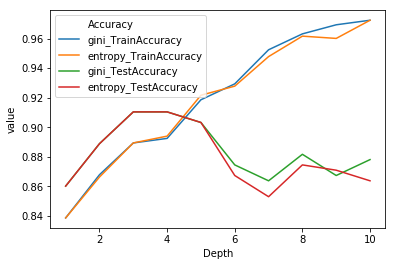

In [37]:
ds_accuracy2_melt = pd.melt(ds_accuracy2, id_vars = ["Criterion", "Depth"])
ds_accuracy2_melt["Accuracy"] = ds_accuracy2_melt["Criterion"] + "_" + ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth", y = "value", hue="Accuracy", data = ds_accuracy2_melt)

In [38]:
#의사결정나무 모델 파라미터 조정
#train 및 test 정확도 결과저장용
train_accuracy = []; test_accuracy = []
#parameter 결과 테이블을 위함
para_criterion = []; para_max_depth = []; para_min_leaf_size = []
#최대 깊이 1~10까지 순차 실행
max_depth = 10
list_min_leaf_size = [i*10 for i in range(1, 6)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, min_samples_leaf = leafsize, random_state = 1234)
        tree3.fit(ds_tel_train_x, ds_tel_train_y)
        train_accuracy.append(tree3.score(ds_tel_train_x, ds_tel_train_y))
        test_accuracy.append(tree3.score(ds_tel_test_x, ds_tel_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [39]:
#데이터테이블로 저장
#데이터 테이블로 저장
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.909,0.871
1,gini,10,20,0.903,0.910
2,gini,10,30,0.848,0.871
3,gini,10,40,0.848,0.871
4,gini,10,50,0.802,0.785
5,entropy,10,10,0.909,0.871
6,entropy,10,20,0.903,0.910
7,entropy,10,30,0.848,0.871
8,entropy,10,40,0.848,0.871
9,entropy,10,50,0.840,0.857


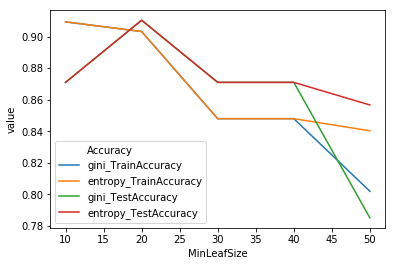

In [40]:
#정확도를 그래프로 표현
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars = ["Criterion", "Depth", "MinLeafSize"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data = ds_accuracy3_melt)

In [43]:
#graphviz 패키지로 트리 모델 시각화
tree = DecisionTreeClassifier(criterion = "gini", max_depth= 4, random_state = 1234)
tree.fit(ds_tel_train_x, ds_tel_train_y)

export_graphviz(tree, out_file = "tree.dot", class_names=["0","1"], feature_names = ds_tel_train_x.columns, impurity=False, filled = True)

os.environ["PATH"]+= os.pathsep + "./.wine/drive_c/Program Files (x86)/Graphviz2.38/bin/"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [44]:
tree4 = DecisionTreeClassifier(criterion= "gini", max_depth = 4, min_samples_leaf = 50, random_state = 1234)
tree5 = tree4.fit(ds_tel_train_x, ds_tel_train_y)

export_graphviz(tree5, out_file = "tree2.dot", class_names = ["0","1"], feature_names = ds_tel_train_x.columns, impurity=False, filled = True)

with open("tree2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [45]:
tree4 = DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 200, random_state = 1234)
tree5 = tree4.fit(ds_tel_train_x, ds_tel_train_y)

export_graphviz(tree5, out_file = "tree3.dot", class_names = ["0", "1"], feature_names = ds_tel_train_x.columns, impurity = False, filled = True)

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [46]:
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = ds_tel_train_x.columns
ds_feature_importance["Importance"] = tree.feature_importances_
ds_feature_importance.sort_values("Importance", ascending = False)
ds_feature_importance.round(3)

,Feature,Importance
0,AGE,0.020
1,SERVICE_DURATION,0.000
2,DROPPED_CALLS,0.236
3,PEAK_CALLS_NO,0.000
4,PEAK_CALLS_TIME,0.127
5,WEEKEND_CALLS_NO,0.021
6,WEEKEND_CALLS_TIME,0.000
7,TOTAL_CALLS_NO,0.000
8,TOTAL_CALLS_TIME,0.000
9,CUSTOMER_ID_K100420,0.000


In [ ]:
def plot_feature_importances(model):
    n_features = ds_tel_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_tel_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
    
plot_feature_importances(tree)